In [4]:
!pip install xgboost


DISEASE PREDICTION FROM MEDICAL DATA
Dataset: Breast Cancer Wisconsin

1. Loading Dataset...
Dataset Shape: (569, 30)
Features: 30
Samples: 569

Target Distribution:
Malignant (0): 212
Benign (1): 357

2. Exploratory Data Analysis...

Missing Values: 0

First 5 rows of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974    

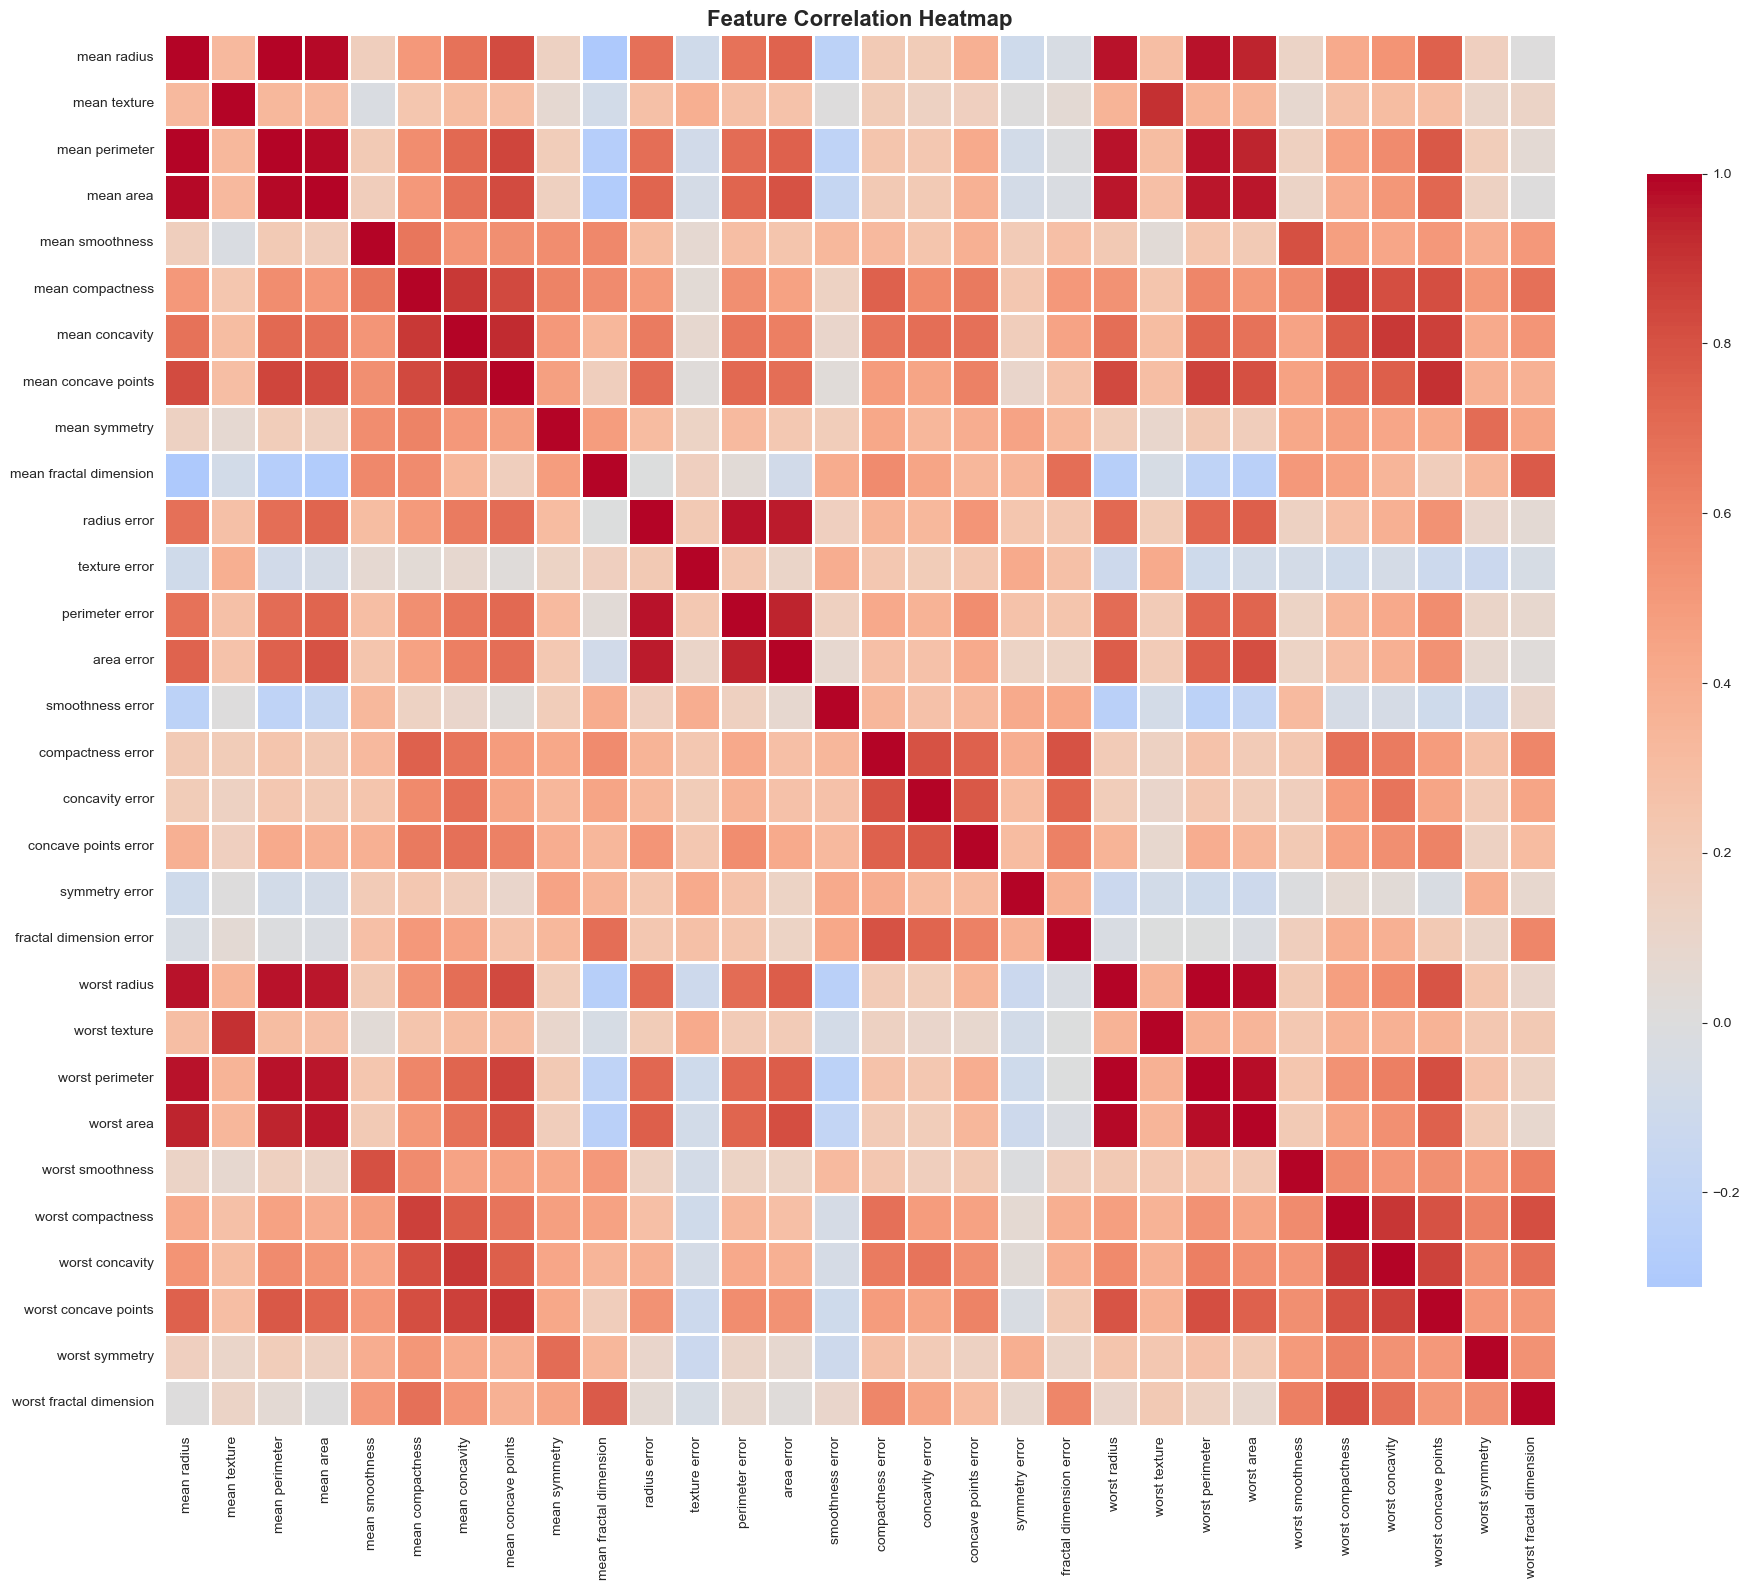

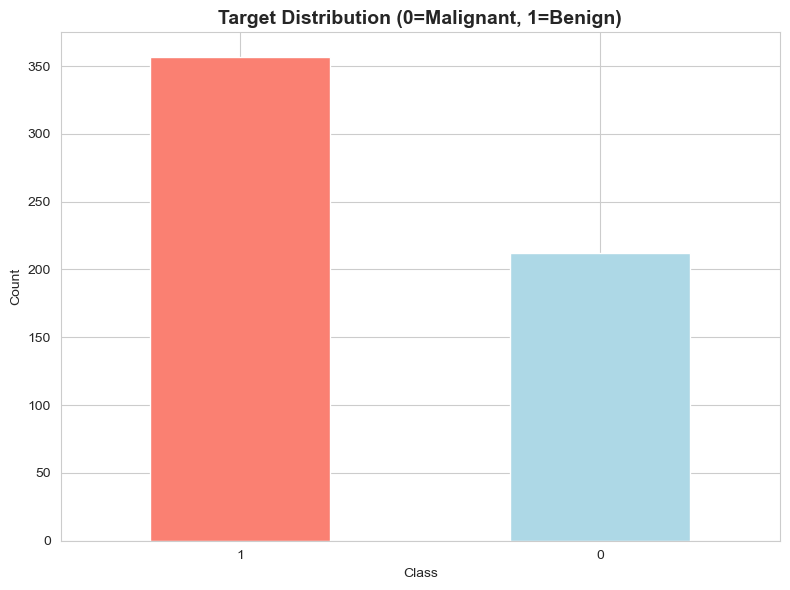


3. Data Preprocessing...
Training set size: 455
Testing set size: 114
Feature scaling completed!

4. Training Models...

Training Logistic Regression...
✓ Logistic Regression trained successfully!

Training Support Vector Machine...
✓ Support Vector Machine trained successfully!

Training Random Forest...
✓ Random Forest trained successfully!

Training XGBoost...
✓ XGBoost trained successfully!

5. Model Evaluation Results...
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
   Logistic Regression    0.9825     0.9861  0.9861    0.9861   0.9954
Support Vector Machine    0.9825     0.9861  0.9861    0.9861   0.9950
         Random Forest    0.9561     0.9589  0.9722    0.9655   0.9937
               XGBoost    0.9561     0.9467  0.9861    0.9660   0.9901

🏆 Best Model: Logistic Regression
   Accuracy: 0.9825

6. Creating Visualizations...


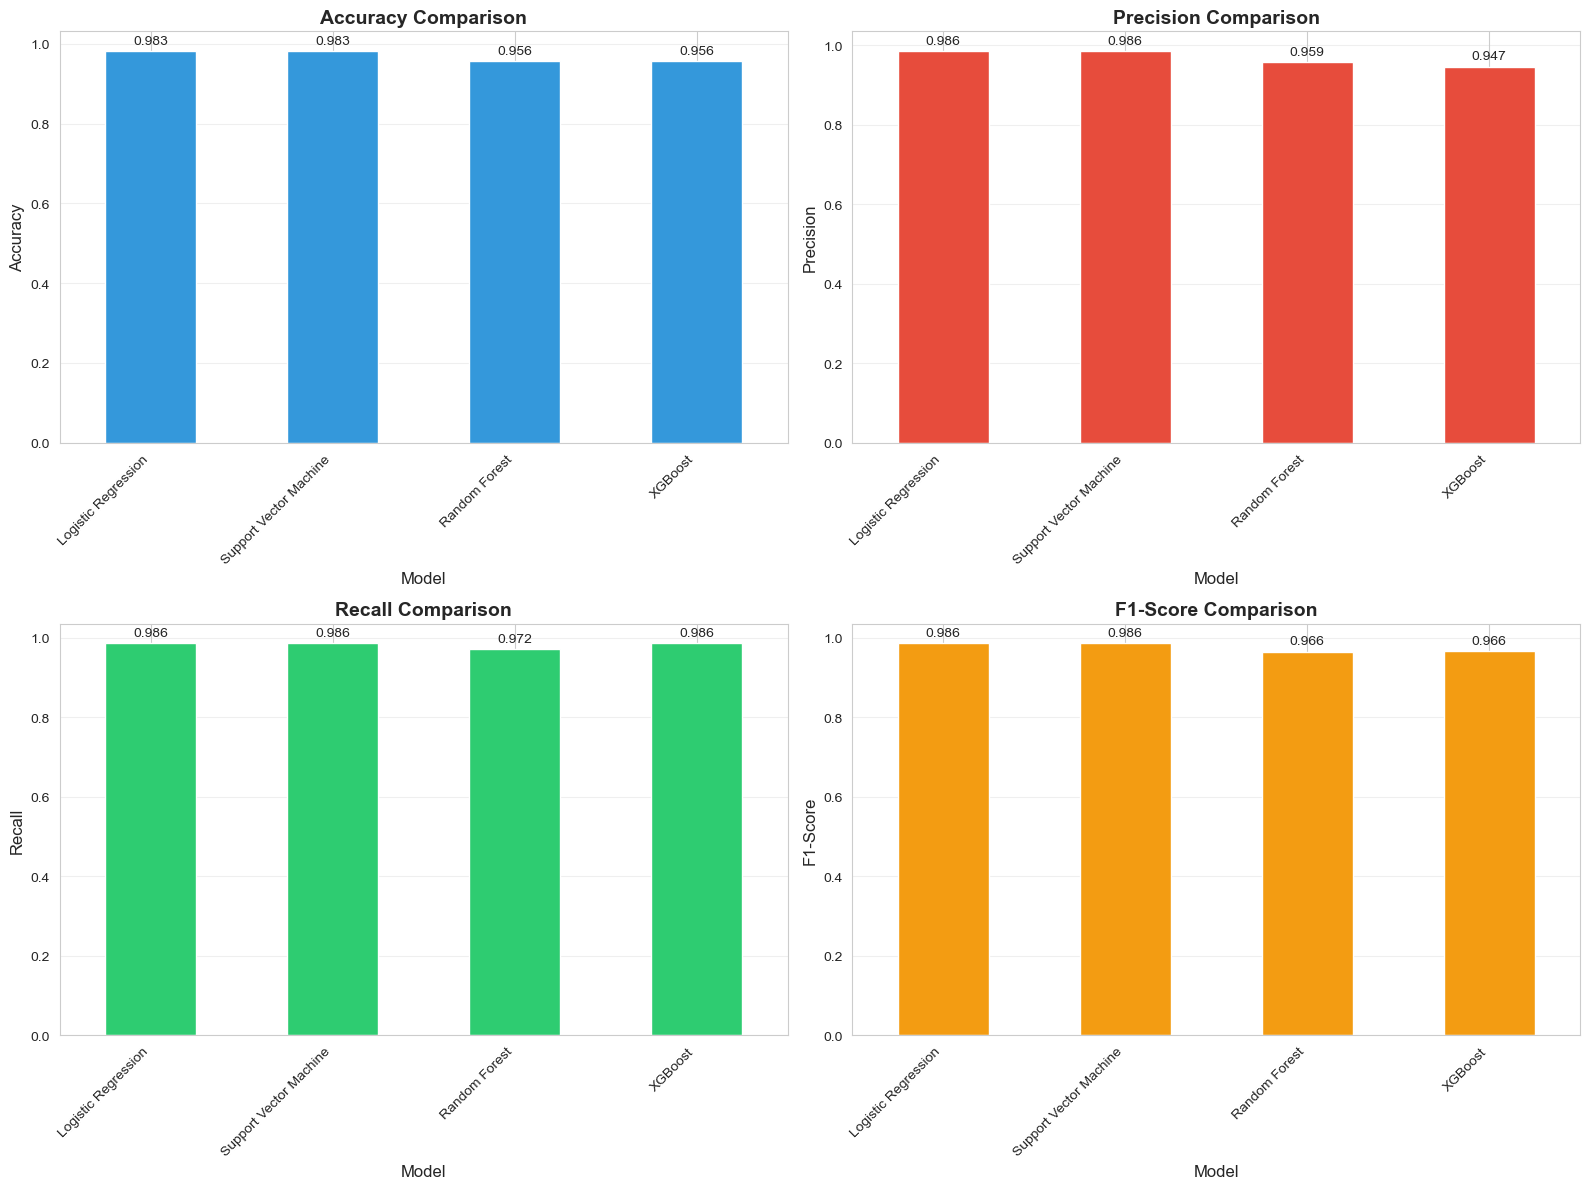

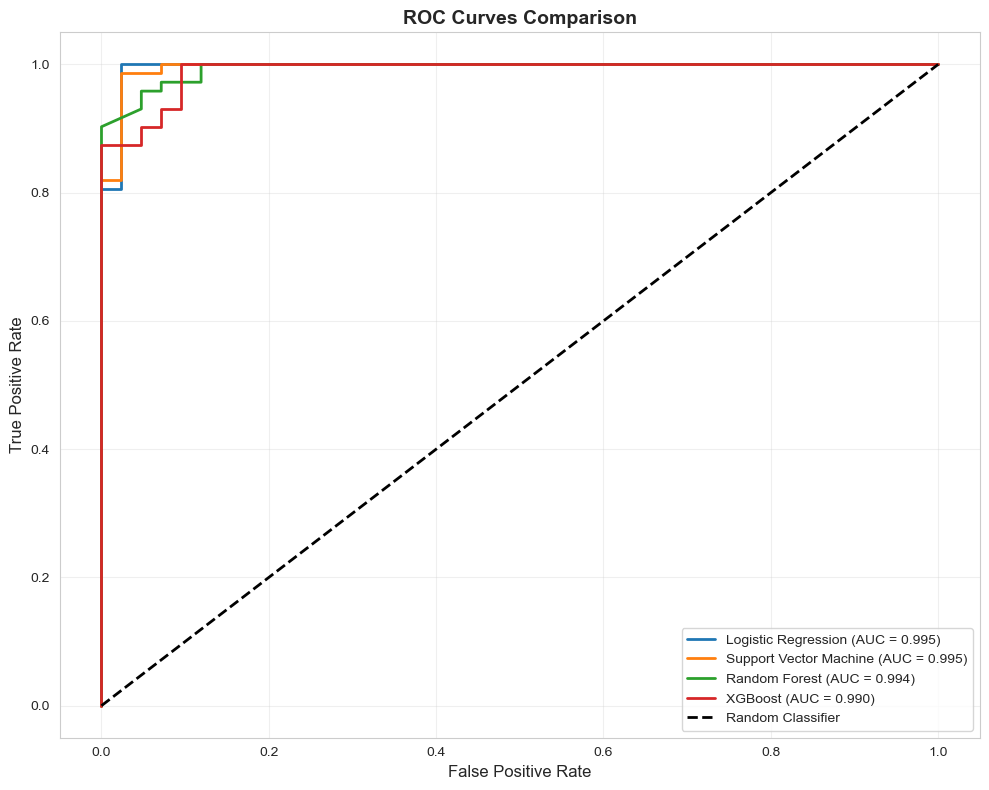

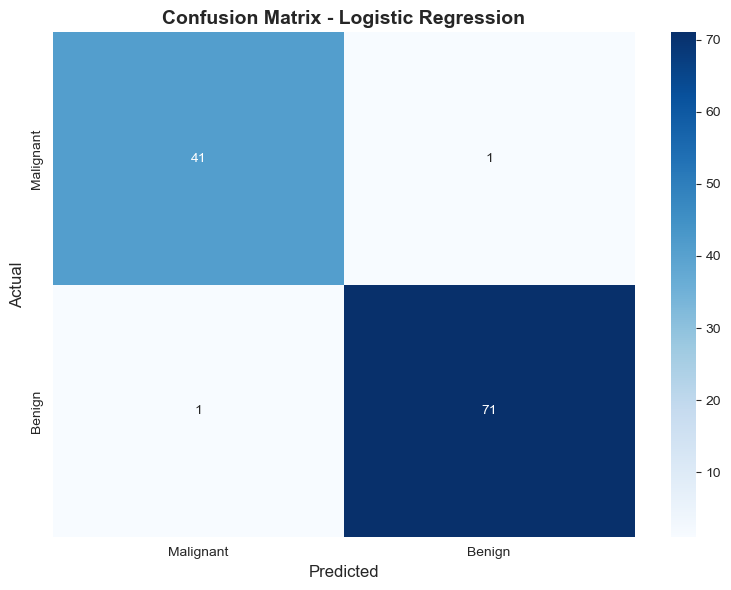


7. Feature Importance Analysis...

Top 10 Most Important Features (Random Forest):
             Feature  Importance
          worst area    0.140016
worst concave points    0.129530
        worst radius    0.097696
 mean concave points    0.090885
     worst perimeter    0.072226
      mean perimeter    0.069574
         mean radius    0.068676
      mean concavity    0.057638
           mean area    0.049172
     worst concavity    0.034340


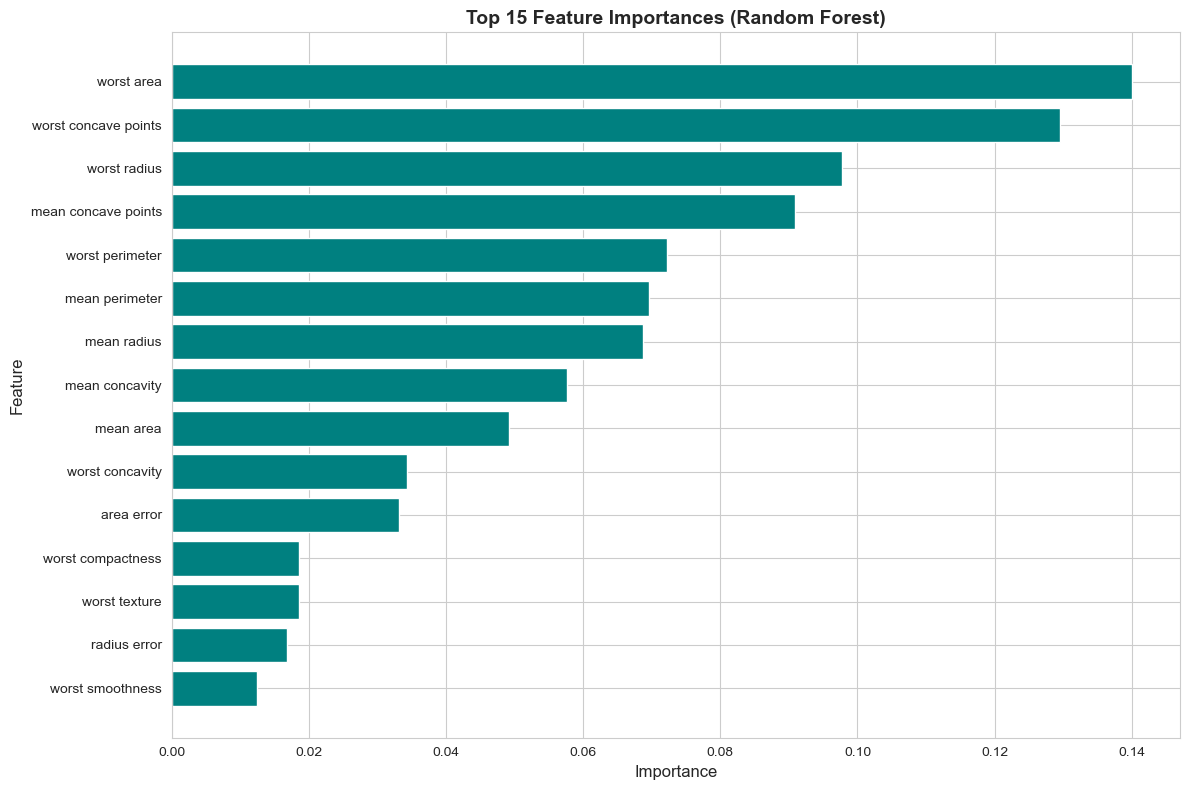


8. Detailed Classification Report (Best Model)...
Model: Logistic Regression
               precision    recall  f1-score   support

Malignant (0)       0.98      0.98      0.98        42
   Benign (1)       0.99      0.99      0.99        72

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114


9. Saving Results...
✓ Results saved to 'model_results.csv'
✓ Visualizations saved as PNG files

PROJECT COMPLETED SUCCESSFULLY!

Generated Files:
  • model_results.csv
  • correlation_heatmap.png
  • target_distribution.png
  • model_comparison.png
  • roc_curves.png
  • confusion_matrix_best.png
  • feature_importance.png


In [5]:
"""
Disease Prediction from Medical Data
Task 4: Code Alpha ML Internship
Dataset: Breast Cancer Wisconsin (UCI ML Repository)
"""

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("DISEASE PREDICTION FROM MEDICAL DATA")
print("Dataset: Breast Cancer Wisconsin")
print("="*60)

# ==================== 1. LOAD DATASET ====================
print("\n1. Loading Dataset...")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Dataset Shape: {X.shape}")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"\nTarget Distribution:")
print(f"Malignant (0): {(y==0).sum()}")
print(f"Benign (1): {(y==1).sum()}")

# ==================== 2. EXPLORATORY DATA ANALYSIS ====================
print("\n2. Exploratory Data Analysis...")

# Check for missing values
print(f"\nMissing Values: {X.isnull().sum().sum()}")

# Display first few rows
print("\nFirst 5 rows of dataset:")
print(X.head())

# Statistical summary
print("\nStatistical Summary:")
print(X.describe())

# Correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Target distribution
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Target Distribution (0=Malignant, 1=Benign)', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 3. DATA PREPROCESSING ====================
print("\n3. Data Preprocessing...")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature Scaling (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

# ==================== 4. MODEL TRAINING ====================
print("\n4. Training Models...")

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression and SVM
    if name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"✓ {name} trained successfully!")

# ==================== 5. MODEL EVALUATION ====================
print("\n5. Model Evaluation Results...")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

results_df = results_df.round(4)
print(results_df.to_string(index=False))
print("="*80)

# Find best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {results_df['Accuracy'].max():.4f}")

# ==================== 6. VISUALIZATION ====================
print("\n6. Creating Visualizations...")

# Performance comparison bar plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, 
                    color=colors[idx], legend=False)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))
for name in results.keys():
    if name in ['Logistic Regression', 'Support Vector Machine']:
        fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    else:
        fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    
    auc = results[name]['roc_auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix for best model
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 7. FEATURE IMPORTANCE ====================
print("\n7. Feature Importance Analysis...")

# Get feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Importance'], color='teal')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 8. DETAILED CLASSIFICATION REPORT ====================
print("\n8. Detailed Classification Report (Best Model)...")
print("="*60)
print(f"Model: {best_model_name}")
print("="*60)
print(classification_report(y_test, y_pred_best, 
                          target_names=['Malignant (0)', 'Benign (1)']))

# ==================== 9. SAVE RESULTS ====================
print("\n9. Saving Results...")
results_df.to_csv('model_results.csv', index=False)
print("✓ Results saved to 'model_results.csv'")
print("✓ Visualizations saved as PNG files")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nGenerated Files:")
print("  • model_results.csv")
print("  • correlation_heatmap.png")
print("  • target_distribution.png")
print("  • model_comparison.png")
print("  • roc_curves.png")
print("  • confusion_matrix_best.png")
print("  • feature_importance.png")
print("="*60)

In [1]:
import os
print(os.getcwd())

C:\Users\harsh\anaconda_projects\b02a2e8f-92a8-442e-a14c-6183dd753d0d
